The mean squared error 0.00011892959120106748 

The r squared error 0.9997723385942726 

CPU Time 0.08086991310119629 

Predicted ZHVI values for 2025: 

    1/31/2025  2/28/2025  3/31/2025  4/30/2025  5/31/2025  6/30/2025  \
0    2.590692   2.590692   2.590692   2.590692   2.590692   2.590692   
1   -0.440011  -0.440011  -0.440011  -0.440011  -0.440011  -0.440011   
2   -0.150794  -0.150794  -0.150794  -0.150794  -0.150794  -0.150794   
3    0.822566   0.822566   0.822566   0.822566   0.822566   0.822566   
4   -0.635149  -0.635149  -0.635149  -0.635149  -0.635149  -0.635149   
5   -0.617271  -0.617271  -0.617271  -0.617271  -0.617271  -0.617271   
6   -0.956623  -0.956623  -0.956623  -0.956623  -0.956623  -0.956623   
7   -0.495574  -0.495574  -0.495574  -0.495574  -0.495574  -0.495574   
8   -0.464149  -0.464149  -0.464149  -0.464149  -0.464149  -0.464149   
9   -0.803599  -0.803599  -0.803599  -0.803599  -0.803599  -0.803599   
10   0.851950   0.851950   0.851950   0.851950   0.851

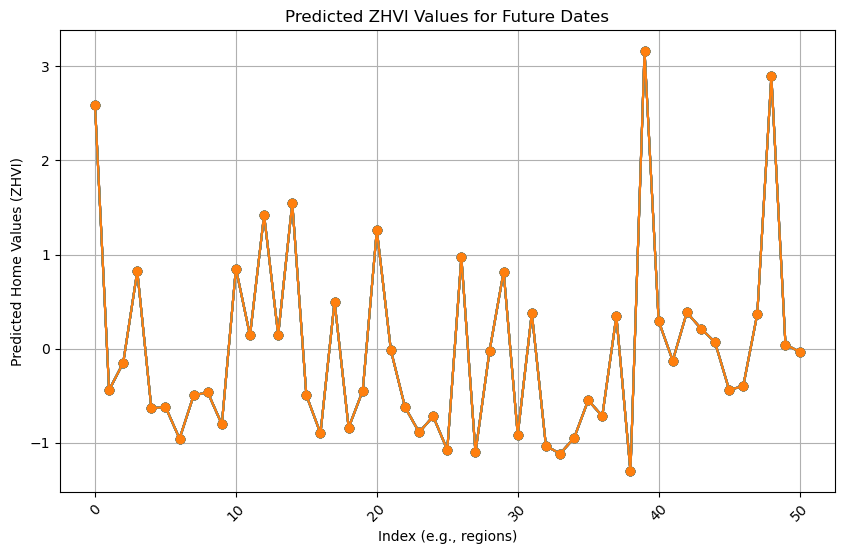

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#scaling the data using Z scaling. This is meant to standardize the values
#so that prediction is more efficient. This is a part of the cleaning process
from sklearn.preprocessing import StandardScaler 
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



realEstateData = pd.read_csv('Zillow Real Estate Data.csv')
# Drop the StateName column since the data is not needed for the prediction
realEstateData.drop(columns=['StateName'], inplace=True)

#this creates a numeric_columns variable that only select columns that include numbers since some columns contain String
numeric_columns = realEstateData.select_dtypes(include='number').columns

# this excludes the size rank and region column so that the values aren't converted when standardized
# Standardizing the data is important so that when linear regression is applied, the values will be in the same range
# for accurate results

exclude_columns = ['SizeRank', 'RegionID']
zhvi_columns = [col for col in numeric_columns if col not in exclude_columns]

# Fill missing values for ZHVI columns with the mean
realEstateData[zhvi_columns] = realEstateData[zhvi_columns].fillna(realEstateData[zhvi_columns].mean())

# a scaler object to begin standardizing the numerical data
scaler = StandardScaler()
realEstateData[zhvi_columns] = scaler.fit_transform(realEstateData[zhvi_columns])


#print(realEstateData.describe())


#print(realEstateData.dtypes)
#realEstateData.head()
#print(realEstateData)

future_date = '6/30/2020'

y = realEstateData[future_date]
x = realEstateData.drop(columns=['1/31/2000', 'SizeRank', 'RegionID', 'RegionName', 'RegionType',future_date])

#splits the data into testing and training the algorithm
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


start_time = time.time()

#creates an instance of the linear regression 
data_model = LinearRegression()
data_model.fit(x_train, y_train)


end_time = time.time()
cpu_time = end_time - start_time


#call the predict method and passes x_test as the argument
yPrediction = data_model.predict(x_test)
#future_predictions = data_model.predict(x_test) 
#print(future_predictions)


future_dates = ['1/31/2025', '2/28/2025', '3/31/2025', '4/30/2025', '5/31/2025', '6/30/2025', 
                '7/31/2025', '8/31/2025', '9/30/2025', '10/31/2025', '11/30/2025', '12/31/2025']

new_dataframe = realEstateData.copy()



for date in future_dates:
    # Make predictions using only the original features (zhvi_columns) from the data, excluding the future date columns
    new_dataframe[date] = data_model.predict(x)
    

# measures the accuracy of the data   
meanSquaredError = mean_squared_error(y_test, yPrediction)

r_squared = r2_score(y_test, yPrediction)

print("The mean squared error",meanSquaredError,"\n")
print("The r squared error",r_squared,"\n")
print("CPU Time",cpu_time,"\n")

# Print the predicted ZHVI values for 2025
print("Predicted ZHVI values for 2025: \n")

print(new_dataframe[future_dates])
#print(realEstateData.head())

# Plot each future date's predicted value
plt.figure(figsize=(10, 6))

# Loop through each future date and plot the values
for date in future_dates:
    plt.plot(new_dataframe.index, new_dataframe[date], marker='o', label=f'Predicted {date}')

# Add labels and title
plt.xlabel('Index (e.g., regions)')
plt.ylabel('Predicted Home Values (ZHVI)')
plt.title('Predicted ZHVI Values for Future Dates')

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Show grid for better visualization
plt.grid(True)

# Show the plot
plt.savefig('linear.png', bbox_inches='tight')
plt.show()

